# Analysis of Global Countries' Covid-19 Pandemic Responses

##### Overview: 
Coronavirus disease (COVID-19) is an infectious disease caused by a newly discovered coronavirus. Most people infected with the COVID-19 virus will experience mild to moderate respiratory illness and recover without requiring special treatment.

##### Goals: 
1. Determine if countries with earlier mandates handled Coronavirus better than countries who waited longer to impose mandates.
2. Determine mortality rate v age and see who is most susceptible to contracting Coronavirus
3. Determine if comorbidity leads to higher mortality rates

##### Sources:
- https://ourworldindata.org/covid-cases?country=USA~CHN~JPN 
- https://ourworldindata.org/policy-responses-covid#face-coverings 

##### Tools: 
- Jupyter Notebook
- Pandas 
- Matplotlib 
- SciPy 
- Seaborn

##### Hypothesis: Countries with stricter mandates would be more successful in limiting both the spread and lethality of Covid-19.

In [2]:
# Import Dependencies
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
from numpy.polynomial.polynomial import polyfit
from scipy.stats import linregress
import scipy.stats as st
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# Read CSV files 
data = pd.read_csv("output_data/oxford_clean.csv")

# Format 'Date' from YYYYMMDD to DD/MM/YYYY
data['Date'] = pd.to_datetime(data['Date'], format='%Y%m%d')

# Select columns of interest
data = pd.DataFrame(data, columns = ["CountryName", "Date", "C1_School_closing", "C2_Workplace_closing", "C6_Stay_home_requirements", \
                                         "E1_Income_support", "H6_Facial_coverings", "ConfirmedCases", 'ConfirmedDeaths']) 

# Rename columns
data.columns = ["Country_name", "Date", "School_closing", "Workplace_closing", "Stay_home", "Income_support", \
                    "Facial_coverings", "Confirmed_cases", "Confirmed_deaths"]

data.dropna()
data.head()

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Income_support,Facial_coverings,Confirmed_cases,Confirmed_deaths
0,Brazil,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Brazil,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Brazil,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Brazil,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Brazil,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### School Mandates

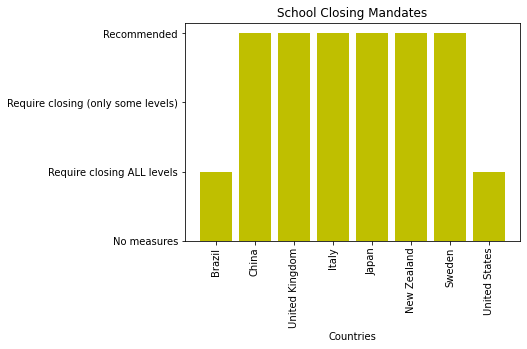

In [8]:
# Create bar plot displaying level of mandate for School Closing Mandates for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates = pd.DataFrame(data, columns= ["Country_name", "School_closing", "Workplace_closing", \
                                        "Stay_home", "Income_support","Facial_coverings"])


mandates['School_Mandates'] = ''

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['School_closing'] == 0.0), 'School_Mandates'] = 'No measures'
mandates.loc[(mandates['School_closing'] == 1.0), 'School_Mandates'] = 'Recommended'
mandates.loc[(mandates['School_closing'] == 2.0), 'School_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['School_closing'] == 3.0), 'School_Mandates'] = 'Require closing ALL levels'

plt.bar(mandates['Country_name'], mandates['School_Mandates'], color = 'y')
plt.xticks(rotation='vertical')
plt.title('School Closing Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/School_Closing_Mandates.png')
plt.show()

### Workplace Mandates

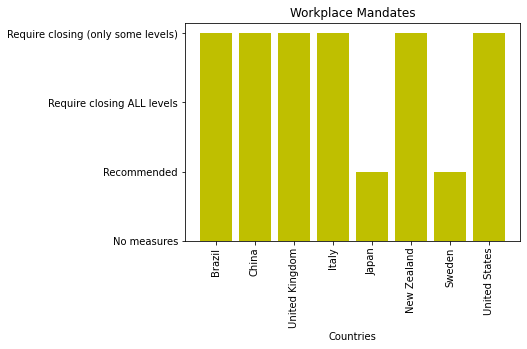

In [5]:
# Create bar plot displaying level of mandate for Workplace Closing Mandates for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['Work_Mandates'] = ''

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Workplace_closing'] == 0), 'Work_Mandates'] = 'No measures'
mandates.loc[(mandates['Workplace_closing'] == 1), 'Work_Mandates'] = 'Recommended'
mandates.loc[(mandates['Workplace_closing'] == 2), 'Work_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['Workplace_closing'] == 3), 'Work_Mandates'] = 'Require closing ALL levels'

plt.bar(mandates['Country_name'], mandates['Work_Mandates'], color = 'y')
plt.xticks(rotation='vertical')
plt.title('Workplace Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Workplace_Mandates.png')
plt.show()

### Stay Home Mandates

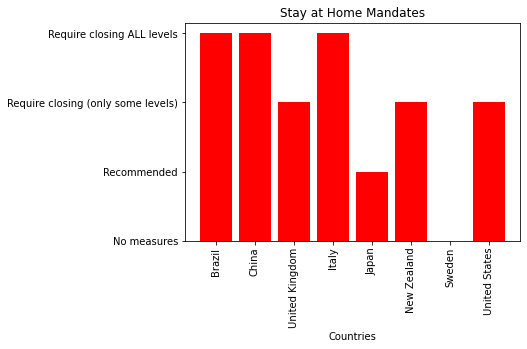

In [6]:
# Create bar plot displaying level of mandate for Stay at Home Requirements for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['Stay_Home_Mandates'] = '' 

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Stay_home'] == 0), 'Stay_Home_Mandates'] = 'No measures'
mandates.loc[(mandates['Stay_home'] == 1), 'Stay_Home_Mandates'] = 'Recommended'
mandates.loc[(mandates['Stay_home'] == 2), 'Stay_Home_Mandates'] = 'Require closing (only some levels)'
mandates.loc[(mandates['Stay_home'] == 3), 'Stay_Home_Mandates'] = 'Require closing ALL levels'

plt.bar(mandates['Country_name'], mandates['Stay_Home_Mandates'], color = 'r')
plt.xticks(rotation='vertical')
plt.title('Stay at Home Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Stay_Home_Mandates.png')
plt.show()

### Income Support Mandates

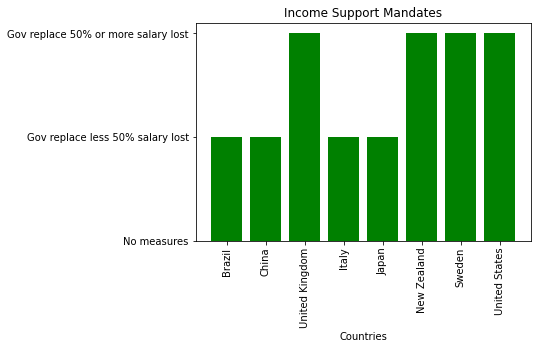

In [7]:
# Create bar plot displaying level of mandate for Income Support for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['Income_Support_Mandates'] = '' 

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Income_support'] == 0.0), 'Income_Support_Mandates'] = 'No measures'
mandates.loc[(mandates['Income_support'] == 1.0), 'Income_Support_Mandates'] = 'Gov replace less 50% salary lost'
mandates.loc[(mandates['Income_support'] == 2.0), 'Income_Support_Mandates'] = 'Gov replace 50% or more salary lost'

plt.bar(mandates['Country_name'], mandates['Income_Support_Mandates'], color = 'g')
plt.xticks(rotation='vertical')
plt.title('Income Support Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Income_Support_Mandates.png')
plt.show()

### Facial Coverings Mandates

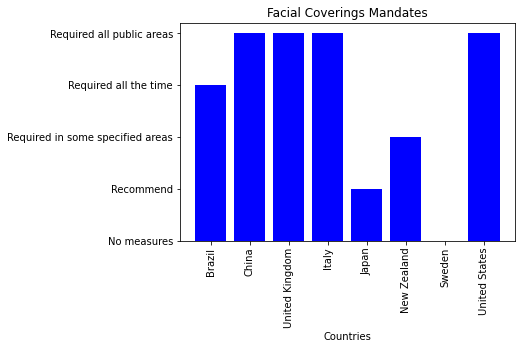

In [77]:
# Create bar plot displaying level of mandate for Facial Coverings for 8 countries of
# interest for all dates reporting (Jan-Oct, 2020) in mandates CSV file
mandates['School_Mandates'] = '' 

# Set multiple conditions and assign reviewer category with .loc
mandates.loc[(mandates['Facial_coverings'] == 0), 'Mask_Mandate'] = 'No measures'
mandates.loc[(mandates['Facial_coverings'] == 1), 'Mask_Mandate'] = 'Recommend'
mandates.loc[(mandates['Facial_coverings'] == 2), 'Mask_Mandate'] = 'Required in some specified areas'
mandates.loc[(mandates['Facial_coverings'] == 3), 'Mask_Mandate'] = 'Required all public areas'
mandates.loc[(mandates['Facial_coverings'] == 4), 'Mask_Mandate'] = 'Required all the time'

plt.bar(mandates['Country_name'], mandates['Mask_Mandate'], color = 'b')
plt.xticks(rotation='vertical')
plt.title('Facial Coverings Mandates')
plt.xlabel('Countries')
plt.savefig('output_mandates/Facial_Coverings_Mandates.png')
plt.show()

In [78]:
# Transpose the .describe so I can run mean on 50% column to find what countries issued relaxed mandates and 
# which had strict mandates

# Narrow DataFrame to mandates only
info = pd.DataFrame(data, columns= ["Country_name", "Date", "School_closing", "Workplace_closing", \
                                    "Stay_home", "Income_support","Facial_coverings"])

info.describe().T

# Everything below 1.4 is relaxed mandate country. everything above is strict country
info_mean = info.describe().T['50%'].mean()
info_mean

1.4

In [79]:
# Change the value of columns from float to integer
info = info.astype({'School_closing': 'int', 'Workplace_closing': 'int', 'Stay_home': 'int',\
                    'Income_support': 'int', 'Facial_coverings': 'int'}) 
info

,Country_name,Date,School_closing,Workplace_closing,Stay_home,Income_support,Facial_coverings
0,Brazil,2020-01-01,0,0,0,0,0
1,Brazil,2020-01-02,0,0,0,0,0
2,Brazil,2020-01-03,0,0,0,0,0
3,Brazil,2020-01-04,0,0,0,0,0
4,Brazil,2020-01-05,0,0,0,0,0
...,...,...,...,...,...,...,...
2405,United States,2020-10-21,3,2,2,2,4
2406,United States,2020-10-22,3,2,2,2,4
2407,United States,2020-10-23,3,2,2,2,4
2408,United States,2020-10-24,3,2,2,2,4


In [80]:
# Brazil country by itself with total mean 
brazil = info.loc[info['Country_name']=='Brazil']
brazil_mean = brazil.mean()
brazil_sum = brazil_mean.sum()
brazil_total = (brazil_sum/5)

# China country by itself with total mean
china = info.loc[info['Country_name']=='China']
china_mean = china.mean()
china_sum = china_mean.sum()
china_total = (china_sum/5)

# UK country by itself with total mean  
uk = info.loc[info['Country_name']=='United Kingdom']
uk_mean = uk.mean()
uk_sum = uk_mean.sum()
uk_total = (uk_sum/5)

# Italy country by itself with total mean 
italy = info.loc[info['Country_name']=='Italy']
italy_mean = italy.mean()
italy_sum = italy_mean.sum()
italy_total = (italy_sum/5)

#Japan country by itself with total mean 
japan = info.loc[info['Country_name']=='Japan']
japan_mean = japan.mean()
japan_sum = japan_mean.sum()
japan_total = (japan_sum/5)

# New Zealand country by itself with total mean 
nz = info.loc[info['Country_name']=='New Zealand']
nz_mean = nz.mean()
nz_sum = nz_mean.sum()
nz_total = (nz_sum/5)

# Sweden country by itself with total mean
meatball = info.loc[info['Country_name']=='Sweden']
meatball_mean = meatball.mean()
meatball_sum = meatball_mean.sum()
meatball_total = (meatball_sum/5)

# United States country by itself with total mean labeled as united states total 
us = info.loc[info['Country_name']=='United States']
us_mean = us.mean()
us_sum = us_mean.sum()
us_total = (us_sum/5)

In [130]:
# Summary df with country and average mandate
total = {'Country':['China','Brazil','United States','Italy','United Kingdom', \
                    'Japan','New Zealand','Sweden'],
         'Average Mandate':[china_total, brazil_total, us_total, italy_total, \
                            uk_total, japan_total, nz_total, meatball_total]}

sum_df = pd.DataFrame(total).round(2)
sum_df

,Country,Average Mandate
0,China,2.00
1,Brazil,1.86
2,United States,1.82
3,Italy,1.65
4,United Kingdom,1.30
5,Japan,0.79
6,New Zealand,0.77
7,Sweden,0.54


In [131]:
#1.4 was the mean of the 50% column above on .describe(), making the df below the Strict countries
strict_df = sum_df.loc[sum_df['Average Mandate']>=1.4]
strict_df

,Country,Average Mandate
0,China,2.00
1,Brazil,1.86
2,United States,1.82
3,Italy,1.65


In [132]:
##1.4 was the mean of the 50% column above on .describe(), making the df below the relax countries
lax_df = sum_df.loc[sum_df['Average Mandate']<=1.4]
lax_df

,Country,Average Mandate
4,United Kingdom,1.30
5,Japan,0.79
6,New Zealand,0.77
7,Sweden,0.54


###### Analysis below was updated to reflect Spending vs Per Capita

In [194]:
#The values below are from "worldometers.info"
# Total populations as of Jan 1, 2020.
braz_pop = 212559417
china_pop = 1408526449
ital_pop = 60005743
jp_pop = 125938348
nz_pop = 4822233
swe_pop = 10151866
uk_pop = 66575226
us_pop = 330380000

# Create a list containing the total populations of each country
pops = (braz_pop, china_pop, ital_pop, jp_pop, nz_pop, swe_pop, uk_pop, us_pop)

# Locate the most recent date data is available for all countries
recent_data = data.loc[data['Date']=='2020-10-22']
recent_data= recent_data[['Country_name','Date','Confirmed_cases','Confirmed_deaths']]

recent_data = recent_data.astype({'Confirmed_cases': 'int', 'Confirmed_deaths': 'int'}) 

#Add a column to e new DF containing total populations for analysis purposes
recent_data['Total Population'] = pops

# Calculate the Percentage of Each Country Infected and Deceased
perc_cases = (recent_data['Confirmed_cases']/recent_data['Total Population'])
perc_deaths = (recent_data['Confirmed_deaths']/recent_data['Total Population'])

recent_data['Percent Infected'] = perc_cases
recent_data['Percent Deceased'] = perc_deaths
recent_data.style.format({"Percent Infected":"{:,.2%}", "Percent Deceased":"{:,.2%}"})

,Country_name,Date,Confirmed_cases,Confirmed_deaths,Total Population,Percent Infected,Percent Deceased
295,Brazil,2020-10-22 00:00:00,5298772,155403,212559417,2.49%,0.07%
597,China,2020-10-22 00:00:00,91044,4739,1408526449,0.01%,0.00%
899,United Kingdom,2020-10-22 00:00:00,789229,44158,60005743,1.32%,0.07%
1206,Italy,2020-10-22 00:00:00,449648,36832,125938348,0.36%,0.03%
1502,Japan,2020-10-22 00:00:00,94524,1685,4822233,1.96%,0.03%
1800,New Zealand,2020-10-22 00:00:00,1558,25,10151866,0.02%,0.00%
2106,Sweden,2020-10-22 00:00:00,109326,5917,66575226,0.16%,0.01%
2406,United States,2020-10-22 00:00:00,8336282,222201,330380000,2.52%,0.07%


In [176]:
# summary df with strict mandate country total confirmed cases
strict_max = recent_data.loc[recent_data['Country_name'].isin(['China','Brazil','United States','Italy'])]
strict_max.style.format({"Percent Infected":"{:,.2%}", "Percent Deceased":"{:,.2%}"})

,Country_name,Date,Confirmed_cases,Confirmed_deaths,Total Population,Percent Infected,Percent Deceased
295,Brazil,2020-10-22 00:00:00,5298772,155403,212559417,2.49%,0.07%
597,China,2020-10-22 00:00:00,91044,4739,1408526449,0.01%,0.00%
1206,Italy,2020-10-22 00:00:00,449648,36832,125938348,0.36%,0.03%
2406,United States,2020-10-22 00:00:00,8336282,222201,330380000,2.52%,0.07%


In [177]:
# summary df with relaxed mandate country total confirmed cases
lax_max = recent_data.loc[recent_data['Country_name'].isin(['United Kingdom','Japan','New Zealand','Sweden'])]
lax_max.style.format({"Percent Infected":"{:,.2%}", "Percent Deceased":"{:,.2%}"})

,Country_name,Date,Confirmed_cases,Confirmed_deaths,Total Population,Percent Infected,Percent Deceased
899,United Kingdom,2020-10-22 00:00:00,789229,44158,60005743,1.32%,0.07%
1502,Japan,2020-10-22 00:00:00,94524,1685,4822233,1.96%,0.03%
1800,New Zealand,2020-10-22 00:00:00,1558,25,10151866,0.02%,0.00%
2106,Sweden,2020-10-22 00:00:00,109326,5917,66575226,0.16%,0.01%


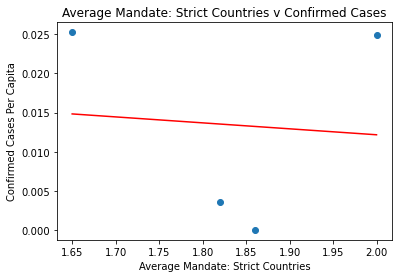

(-0.08088818718865526, 0.9191118128113447)

In [178]:
#linear regression strict mandates v strict cases
x_values = strict_df['Average Mandate']
y_values = strict_max['Percent Infected']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')

#plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Cases Per Capita')
plt.show()

#pearsonr for strict mandates v strict cases
correlation = st.pearsonr(strict_df['Average Mandate'], strict_max['Percent Infected'])
correlation

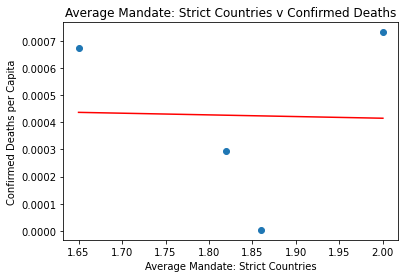

(-0.02603764557827082, 0.9739623544217292)

In [179]:
#linear regression strict mandates v strict deaths
x_values = strict_df['Average Mandate']
y_values = strict_max['Percent Deceased']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')

#plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Strict Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Strict Countries')
plt.ylabel('Confirmed Deaths per Capita')
plt.show()

correlation = st.pearsonr(strict_df['Average Mandate'], strict_max['Percent Deceased'])
correlation

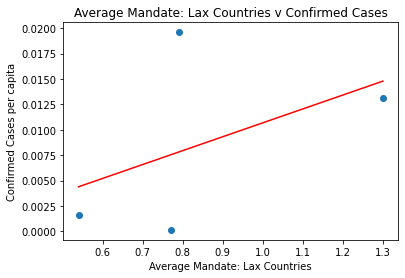

(0.4698851350313702, 0.5301148649686298)

In [180]:
#linear regression relaxed mandates v relaxed cases
x_values = lax_df['Average Mandate']
y_values = lax_max['Percent Infected']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')

#plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Cases')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Cases per capita')
plt.show()

#pearsonr for relaxed mandates v relaxed cases
correlation = st.pearsonr(lax_df['Average Mandate'], lax_max['Percent Infected'])
correlation

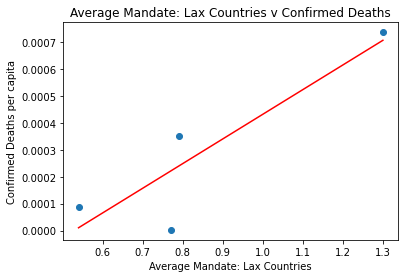

(0.8912695337456252, 0.10873046625437477)

In [181]:
#linear regression relaxed mandates v relaxed deaths
x_values = lax_df['Average Mandate']
y_values = lax_max['Percent Deceased']
(slope, intercept, rvalue, pvalue, stdeer) = linregress(x_values,y_values)
regress_values = x_values*slope+intercept
line_eq = 'y=' +str(round(slope,2))+'x + ' +str(round(intercept,2))
plt.scatter(x_values, y_values)
plt.plot(x_values,regress_values,'r-')

#plt.annotate(line_eq,(15,10),fontsize = 25, color='red')
plt.title('Average Mandate: Lax Countries v Confirmed Deaths')
plt.xlabel('Average Mandate: Lax Countries')
plt.ylabel('Confirmed Deaths per capita')
plt.show()

#pearsonr for relaxed mandates v relaxed deaths
correlation = st.pearsonr(lax_df['Average Mandate'], lax_max['Percent Deceased'])
correlation

### Countries' Total Cases over Time

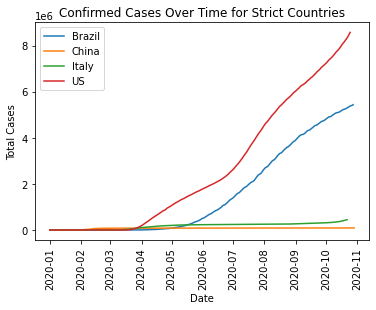

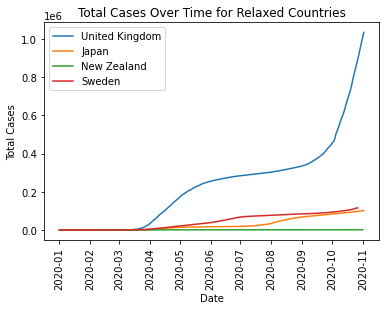

In [182]:
# Locate the Confirmed Cases data for Countries w/ Strict Mandates
fig, ax = plt.subplots()
brazil = data.loc[data['Country_name']=='Brazil']
ax.plot(brazil['Date'],brazil['Confirmed_cases'], label = 'Brazil')
china = data.loc[data['Country_name']=='China']
ax.plot(china['Date'],china['Confirmed_cases'],label='China')
italy = data.loc[data['Country_name']=='Italy']
ax.plot(italy['Date'],italy['Confirmed_cases'],label='Italy')
us = data.loc[data['Country_name']=='United States']
ax.plot(us['Date'],us['Confirmed_cases'],label='US')

# Plot the Confirmed Cases for "Strict" Countries 
plt.xticks(rotation='vertical')
plt.title('Confirmed Cases Over Time for Strict Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/cases_time_strict.png')
plt.show()

# Run the same functions for "Relaxed" Mandates
fig, ax = plt.subplots()
uk = data.loc[data['Country_name']=='United Kingdom']
ax.plot(uk['Date'],uk['Confirmed_cases'],label='United Kingdom')
japan = data.loc[data['Country_name']=='Japan']
ax.plot(japan['Date'],japan['Confirmed_cases'],label='Japan')
nz = data.loc[data['Country_name']=='New Zealand']
ax.plot(nz['Date'],nz['Confirmed_cases'],label='New Zealand')
sweden = data.loc[data['Country_name']=='Sweden']
ax.plot(sweden['Date'],sweden['Confirmed_cases'],label='Sweden')
plt.xticks(rotation='vertical')
plt.title('Total Cases Over Time for Relaxed Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/cases_time_relax.png')
plt.show()

### Countries' Total Deaths over Time¶

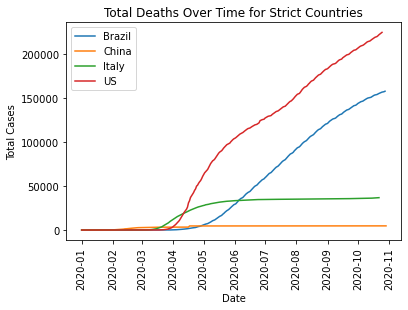

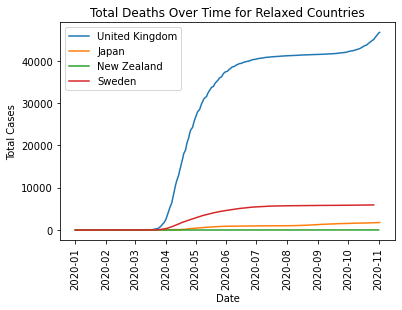

In [183]:
# Locate the Confirmed Deaths for the "Strict Countries"
fig, ax = plt.subplots()
brazil = data.loc[data['Country_name']=='Brazil']
ax.plot(brazil['Date'],brazil['Confirmed_deaths'], label = 'Brazil')
china = data.loc[data['Country_name']=='China']
ax.plot(china['Date'],china['Confirmed_deaths'],label='China')
italy = data.loc[data['Country_name']=='Italy']
ax.plot(italy['Date'],italy['Confirmed_deaths'],label='Italy')
us = data.loc[data['Country_name']=='United States']
ax.plot(us['Date'],us['Confirmed_deaths'],label='US')

# Plot the Confirmed Deaths for "Strict" Countries
plt.xticks(rotation='vertical')
plt.title('Total Deaths Over Time for Strict Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/deaths_time_strict.png')
plt.show()

# Run the same functions for "Relaxed" Countries
fig, ax = plt.subplots()
uk = data.loc[data['Country_name']=='United Kingdom']
ax.plot(uk['Date'],uk['Confirmed_deaths'],label='United Kingdom')
japan = data.loc[data['Country_name']=='Japan']
ax.plot(japan['Date'],japan['Confirmed_deaths'],label='Japan')
nz = data.loc[data['Country_name']=='New Zealand']
ax.plot(nz['Date'],nz['Confirmed_deaths'],label='New Zealand')
sweden = data.loc[data['Country_name']=='Sweden']
ax.plot(sweden['Date'],sweden['Confirmed_deaths'],label='Sweden')
plt.xticks(rotation='vertical')
plt.title('Total Deaths Over Time for Relaxed Countries')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.legend()
plt.savefig('Figures/deaths_time_relax.png')
plt.show()

### Determining Countries' Cases and Deaths by Per Capita

In [218]:
rates = pd.DataFrame(recent_data, columns= ["Country_name", "Date", "Confirmed_cases", "Confirmed_deaths", \
                                    "Total Population", "Percent Infected","Percent Deceased"])

rates = rates.set_index('Country_name')
rates

,Date,Confirmed_cases,Confirmed_deaths,Total Population,Percent Infected,Percent Deceased
Country_name,,,,,,
Brazil,2020-10-22,5298772,155403,212559417,0.024928,0.000731
China,2020-10-22,91044,4739,1408526449,0.000065,0.000003
United Kingdom,2020-10-22,789229,44158,60005743,0.013153,0.000736
Italy,2020-10-22,449648,36832,125938348,0.003570,0.000292
Japan,2020-10-22,94524,1685,4822233,0.019602,0.000349
New Zealand,2020-10-22,1558,25,10151866,0.000153,0.000002
Sweden,2020-10-22,109326,5917,66575226,0.001642,0.000089
United States,2020-10-22,8336282,222201,330380000,0.025232,0.000673


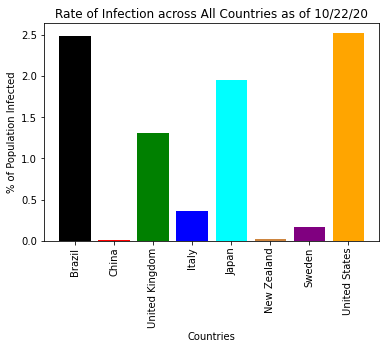

In [222]:
# Rate of Infection across All Countries
plt.bar(rates['Percent Infected'].index, rates['Percent Infected']*100, \
        color=['black', 'red', 'green', 'blue', 'cyan','peru','purple','orange'])
plt.xticks(rotation='vertical')
plt.title('Rate of Infection across All Countries as of 10/22/20')
plt.xlabel('Countries')
plt.ylabel('% of Population Infected')
plt.savefig('Figures/cases_perc.png')

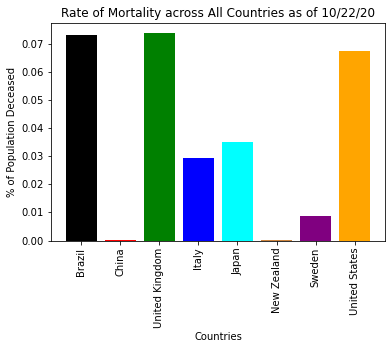

In [223]:
# Rate of Mortality across All Countries
plt.bar(rates['Percent Infected'].index, rates['Percent Deceased']*100, \
        color=['black', 'red', 'green', 'blue', 'cyan','peru','purple','orange'])
plt.xticks(rotation='vertical')
plt.title('Rate of Mortality across All Countries as of 10/22/20')
plt.xlabel('Countries')
plt.ylabel('% of Population Deceased')
plt.savefig('Figures/deaths_perc.png')

### Statistical Analysis

###### Testing our Hypothesis for Infection Rate (2-Sample T-Test)

In [224]:
# Determine the mean infection rate for strict countries
strict_inf = perc_summ.iloc[[0,1,3,7],0:1]
strict_mean = strict_inf.mean()
print(f'Strict {strict_mean*100}')

# Determine the mean infection rate for relaxed countries
relax_inf = perc_summ.iloc[[2,4,5,6],0:1]
relax_mean = relax_inf.mean()
print(f'Relaxed {relax_mean*100}')

#Calculate Independent T-test (p-value = 0.05)
# Code for T-test runs but is not printed for formatting purposes.
st.ttest_ind(strict_inf, relax_inf, equal_var=False)
print('The resulting p-value was 0.58177003')

Strict Percent Infected    1.344896
dtype: float64
Relaxed Percent Infected    0.863747
dtype: float64
The resulting p-value was 0.58177003


##### Testing our Hypothesis for Mortality Rate (2-Sample T-Test)

In [225]:
# Determine the mean mortality rate for strict countries
strict_dth = perc_summ.iloc[[0,1,3,7],-1:]
strict_mean = strict_dth.mean()
print(f'Strict {strict_mean*100}')

# Determine the mean infection rate for relaxed countries
relax_dth = perc_summ.iloc[[2,4,5,6],-1:]
relax_mean = relax_dth.mean()
print(f'Relaxed {relax_mean*100}')

# Calculate Independent T-test (p-value = 0.05)
# Code for T-test runs but is not printed for formatting purposes.
st.ttest_ind(strict_dth, relax_dth, equal_var=False)
print('The resulting p-value was 0.60168065')

Strict Percent Deceased    0.042487
dtype: float64
Relaxed Percent Deceased    0.029416
dtype: float64
The resulting p-value was 0.60168065
